 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#数据初探" data-toc-modified-id="数据初探-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据初探</a></span></li><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#数据与处理" data-toc-modified-id="数据与处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据与处理</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#缺失值处理：随机森林拟合" data-toc-modified-id="缺失值处理：随机森林拟合-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>缺失值处理：随机森林拟合</a></span></li><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#类目特征因子化" data-toc-modified-id="类目特征因子化-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>类目特征因子化</a></span></li><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#Scaling" data-toc-modified-id="Scaling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#模型训练" data-toc-modified-id="模型训练-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#测试" data-toc-modified-id="测试-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>测试</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/machine_learning/Data_Science/Kaggle/01_Titanic%20Disaster/Titanic%20Survival%20Prediction.ipynb#测试数据预处理" data-toc-modified-id="测试数据预处理-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>测试数据预处理</a></span></li></ul></li></ul></div>

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

[Tutorial-CSDN](https://blog.csdn.net/han_xiaoyang/article/details/49797143)

[Python数据分析中 DataFrame axis=0与axis=1的理解-CSDN](https://www.cnblogs.com/nyist-/p/7998326.html)

# 数据初探

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'simhei'

In [26]:
data_train = pd.read_csv('train.csv')

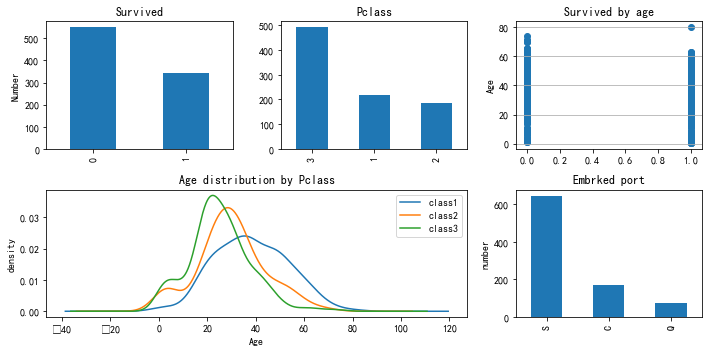

In [4]:
fig = plt.figure(figsize=(10,5))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('Number')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title('Survived by age')

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind="kde")
data_train.Age[data_train.Pclass==2].plot(kind="kde")
data_train.Age[data_train.Pclass==3].plot(kind="kde")
plt.xlabel('Age')
plt.ylabel('density')
plt.title('Age distribution by Pclass')
plt.legend(('class1','class2','class3'),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('Embrked port')
plt.ylabel('number')

fig.tight_layout()

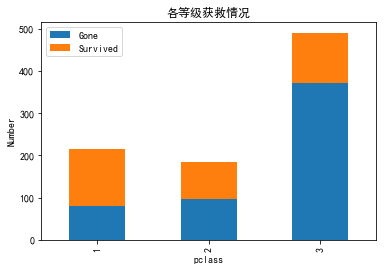

In [5]:
survived_0 =data_train.Pclass[data_train.Survived==0].value_counts()
survived_1 =data_train.Pclass[data_train.Survived==1].value_counts()
df = DataFrame({'Survived':survived_1, 'Gone':survived_0})
df.plot(kind='bar', stacked=True)
plt.title('各等级获救情况')
plt.xlabel('pclass')
plt.ylabel('Number')
plt.show()

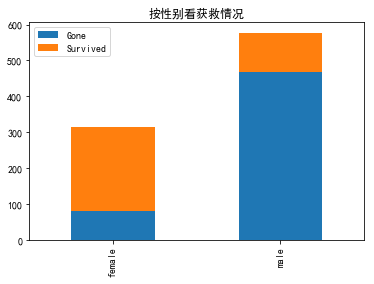

In [6]:
survived_00 = data_train.Sex[data_train.Survived==0].value_counts()
survived_11 = data_train.Sex[data_train.Survived==1].value_counts()
df = DataFrame({'Survived':survived_11, 'Gone':survived_00})
df.plot(kind='bar', stacked=True)
plt.title('按性别看获救情况')
plt.show()

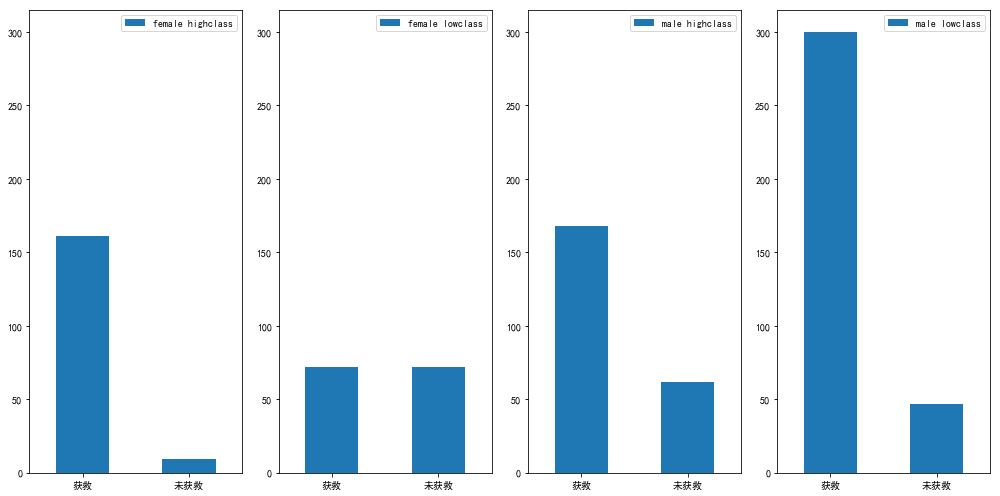

In [7]:
fig2=plt.figure(figsize=(14,7))
fig2.set(alpha=0.65)

ax21=fig2.add_subplot(141)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=3].value_counts().plot(kind='bar',label='female highclass',ax=ax21)
ax21.set_xticklabels(['获救','未获救'],rotation=0)
ax21.legend(['female highclass'], loc='best')

ax22 = fig2.add_subplot(142,sharey=ax21)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().plot(kind='bar', label='female low class',ax=ax22)
ax22.set_xticklabels(['获救','未获救'],rotation=0)
ax22.legend(['female lowclass'],loc='best')


ax23 = fig2.add_subplot(143, sharey=ax21)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().plot(kind='bar', ax=ax23)
ax23.set_xticklabels(['获救','未获救'],rotation=0)
ax23.legend(['male highclass'], loc='best')

ax24 = fig2.add_subplot(144, sharey=ax21)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().plot(kind='bar',ax=ax24)
ax24.set_xticklabels(['获救','未获救'],rotation=0)
ax24.legend(['male lowclass'], loc='best')

plt.setp(ax22.get_yticklabels(),visible=True)
plt.setp(ax23.get_yticklabels(),visible=True)
plt.setp(ax24.get_yticklabels(),visible=True)
fig2.tight_layout()

plt.show()

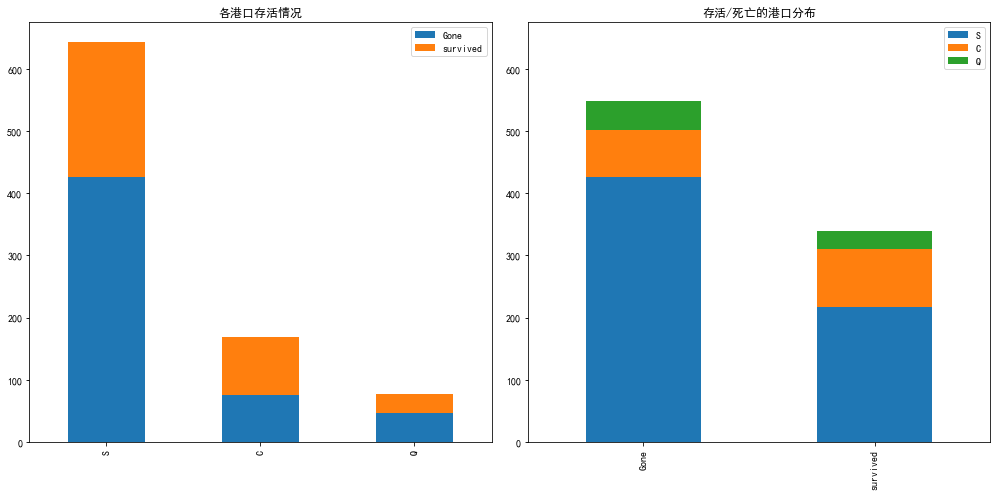

In [14]:
fig3 = plt.figure(figsize=(14,7))

ax31 = fig3.add_subplot(121)
bort_0 = data_train.Embarked[data_train.Survived==0].value_counts()
bort_1 = data_train.Embarked[data_train.Survived==1].value_counts()

bort_df = DataFrame({'survived':bort_1, 'Gone':bort_0})
bort_df.plot(kind='bar', stacked=1, ax=ax31)
ax31.set_title('各港口存活情况')

ax32 = fig3.add_subplot(122, sharey=ax31)
bort_df.T.plot(kind='bar', stacked=1, ax=ax32)
ax32.set_title('存活/死亡的港口分布')

plt.setp(ax32.get_yticklabels(),visible=1)
fig3.tight_layout()
plt.show()

In [16]:
bort_s = bort_df.T
bort_ratio = DataFrame()
for key in ['S', 'C','Q']:
    new_s = bort_s[key]/bort_s[key].sum()
    bort_ratio[key] = new_s
bort_ratio

,S,C,Q
Gone,0.663043,0.446429,0.61039
survived,0.336957,0.553571,0.38961


C港存活率最高

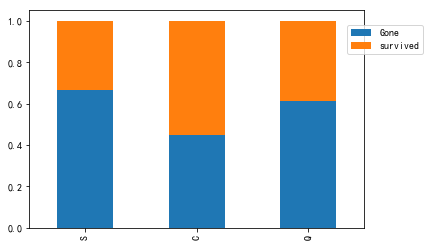

In [17]:
bort_ratio.T.plot(kind='bar', stacked=1)
plt.legend(loc=(0.95,0.8));

# 数据与处理
## 缺失值处理：随机森林拟合
- 缺失较多，舍弃
- 缺失较少的离散值，加入NaN作为一个类目；连续值：离散化后，加入NaN
- 拟合出缺失值

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
def set_missing_ages(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    y = known_age[:,0]
    X= known_age[:,1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age[:,1:])
    
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df,rfr

In [24]:
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    
    return df

In [27]:
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

## 类目特征因子化
`pd.get_dummies()`

In [29]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummoes_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
dummies_sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

In [30]:
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_sex, dummoes_Pclass], axis=1)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,1,0,1,0,0,1


## Scaling

标准化：$$x=\frac{x-x_{mean}}{std}$$

In [32]:
import sklearn.preprocessing as preprocessing

In [67]:
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))  #reshape(-1,n)：-1不知道多少行，让他自己算，n列
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,0,0,1,0.392955,-0.486337


In [68]:
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

In [69]:
train_df.head()

,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,1,1,0,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,1,1,0,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,0,0,0,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337


In [70]:
train_np = train_df.values

y = train_np[:,0]

X = train_np[:,1:]

In [84]:
X[1,:]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.61318183,  0.78684529])

# 模型训练

In [71]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

# 测试

## 测试数据预处理

In [44]:
data_test = pd.read_csv('test.csv')
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0

随机森林，年龄预测

In [45]:
tmp_df= data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
X = null_age[:,1:]
predictedages = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()), 'Age'] = predictedages

类目特征因子化

In [47]:
data_test = set_Cabin_type(data_test)

In [53]:
dummies_Cabin_t = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked_t = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_sex_t = pd.get_dummies(data_test.Sex, prefix='Sex')
dummoes_Pclass_t = pd.get_dummies(data_test.Pclass, prefix='Pclass')  #所有变更0/1后，可分别查看各Pclass的相关系数

In [63]:
df_test = pd.concat([data_test, dummies_Cabin_t, dummies_Embarked_t, dummies_sex_t, dummoes_Pclass_t], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [73]:
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scales'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)

In [87]:
regex= 'Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*'

In [88]:
test = df_test.filter(regex=regex)

In [93]:
predictions = clf.predict(test)
result = DataFrame({'PassgenerID': data_test['PassengerId'].values, 'Survived': predictions.astype(np.int32)})
result.to_csv('logistic_regression_preditions.csv', index=False)

In [100]:
DataFrame({'Columns':list(train_df.columns)[1:], 'coef': list(clf.coef_.T)})

,Columns,coef
0,SibSp,[-0.344228734359]
1,Parch,[-0.104931219533]
2,Cabin_No,[-0.462599141325]
3,Cabin_Yes,[0.439540353986]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.417262863677]
7,Sex_female,[2.41917798822]
8,Sex_male,[-0.214818264694]
9,Pclass_1,[0.341143366382]
